<a href="https://colab.research.google.com/github/codeforgirls-sa/ml/blob/master/Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Example



<h1> Contents </h1>








* Understand Data 
* Model Development
* Save the Model





---

 





#Understand Data
 <h2>Read Dataset Description</h2>
We want to predict students performance in math in secondary education of a high school. Please read the description of data set before start.

 

### Dataset info
This data approaches student achievement in a secondary school for Math. The data attributes include student grades, demographic, social and school related features. It was collected by using school reports and questionnaires.
![alt text](https://github.com/codeforgirls-sa/ml/blob/master/Dataset%20info.jpg?raw=true)

![alt text](https://github.com/Ruqyai/Files/blob/master/workflow.png?raw=true)



###Import libraries




In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pickle

### Load the dataset

In [0]:
filename = "https://raw.githubusercontent.com/codeforgirls-sa/ml/master/math_cleaned_data.csv"


###Read the dataset

In [0]:
#import pandas as pd
df = pd.read_csv(filename)

##Data Exploration

In [28]:
df.head()

,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,famrel,freetime,goout,health,absences,G1,G2,G3
0,0,18,0,4,4,0,0,0,2,2,0,0,0,0,0,0,0,4,3,4,3,6,5,6,6.0
1,0,17,0,1,1,0,1,1,1,2,0,1,1,0,0,0,1,5,3,3,3,4,5,5,6.0
2,0,15,1,1,1,0,1,0,1,2,3,0,0,1,0,0,1,4,3,2,3,10,7,8,10.0
3,0,15,0,4,2,1,2,0,1,3,0,1,1,1,1,0,1,3,2,2,5,2,15,14,15.0
4,0,16,0,3,3,2,1,1,1,2,0,1,1,1,0,0,0,4,3,2,5,4,6,10,10.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         357 non-null    int64  
 1   age         357 non-null    int64  
 2   famsize     357 non-null    int64  
 3   Medu        357 non-null    int64  
 4   Fedu        357 non-null    int64  
 5   Mjob        357 non-null    int64  
 6   Fjob        357 non-null    int64  
 7   guardian    357 non-null    int64  
 8   traveltime  357 non-null    int64  
 9   studytime   357 non-null    int64  
 10  failures    357 non-null    int64  
 11  schoolsup   357 non-null    int64  
 12  famsup      357 non-null    int64  
 13  paid        357 non-null    int64  
 14  activities  357 non-null    int64  
 15  higher      357 non-null    int64  
 16  internet    357 non-null    int64  
 17  famrel      357 non-null    int64  
 18  freetime    357 non-null    int64  
 19  goout       357 non-null    i



##Start Model Development
  1. **Define labels and features**



In [0]:
#Define labels and features
labels = df['G3'].values
features = df.drop(['G3'],axis=1).values

2. **Spilt data**

In [31]:
#Spilt the data; 30% for testing and 70% for training

# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(249, 24) (108, 24) (249,) (108,)



   3. **Bulid, Train and Evaluate the Model**


In [32]:
# Build The Model

#from sklearn import linear_model
model=linear_model.LinearRegression()  

# Train the Model
model.fit(X_train, y_train)

# Evaluate
Accuracy = model.score(X_train, y_train)
print ("Accuracy of the training : ", Accuracy*100)

accuracy = model.score(X_test, y_test)
print ("Accuracy of the testing : ", accuracy*100)


Accuracy of the training :  93.8632873691374
Accuracy of the testing :  93.76001485581179


4. **Predict**

In [33]:
# Predict 
predict = model.predict(X_test)
idx= np.random.choice(X_test.shape[0]) #import numpy as np   X_test.shape ==> (108, 24)  X_test.shape[0] ==> 108
print ("Predicted final grade : ", predict[idx])
print ("Real final grade : ", y_test[idx])

Predicted final grade :  17.926183322623793
Real final grade :  18.0


5. **Visualize**

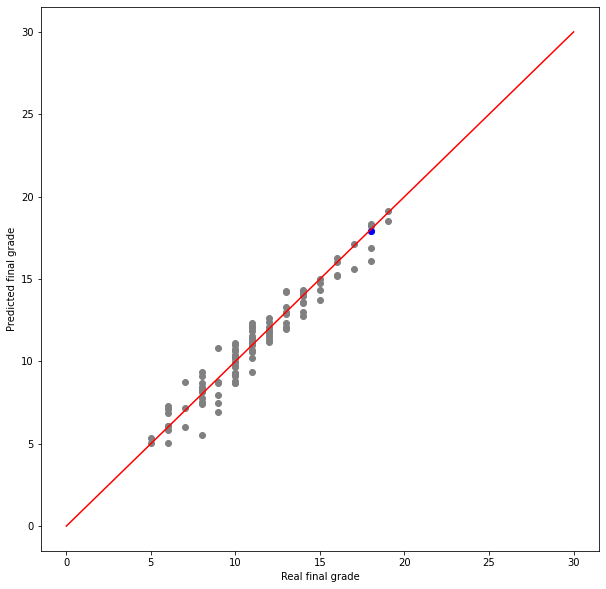

In [34]:
# visualization

#import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))  
plt.scatter(y_test, predict,  color='Grey')
plt.scatter(y_test[idx], predict[idx] , color='blue')
plt.xlabel('Real final grade')
plt.ylabel('Predicted final grade')
plt.plot([0, 30], [0, 30], color='red')

In [35]:
show_as_table={"Actual": y_test.astype(int), "Predict": predict.astype(int)}
predict_real= pd.DataFrame(show_as_table)
predict_real.head(10)

,Actual,Predict
0,13,11
1,11,11
2,10,10
3,14,14
4,17,15
5,19,19
6,10,10
7,6,5
8,9,8
9,10,9


#Save, Load and Use the Model

In [0]:
# Save the model

#import pickle
with open('saved_model.pkl','wb') as f:
    pickle.dump(model,f)

In [0]:
# Load the saved model
with open('saved_model.pkl', 'rb') as f:
    model_load = pickle.load(f)

In [38]:
#check if it the same model by print the score for test set
result = model_load.score(X_test, y_test)
print(result*100)

93.76001485581179


In [39]:
df.columns[:-1]

Index(['sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'G1', 'G2'],
      dtype='object')

In [40]:
#use the saved model for prediction
exmaple_input= [  1, 18 , 1 , 2 , 3  ,2 , 2,  1 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 4 , 2 , 5 , 1 , 2 , 5 , 2 , 18,  20]
exmaple_predict= model_load.predict(np.array( [exmaple_input,]))
print("Predicted example input : ", int(exmaple_predict))


Predicted example input :  20
